<a href="https://colab.research.google.com/github/Ashutosh-0812/Ashutosh-0812/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gradio

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report,roc_curve
import matplotlib.pyplot as plt
import pickle




In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
X = df.drop("Outcome" , axis =1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
y = df["Outcome"]

In [13]:
scalar = StandardScaler()

In [19]:
X_scaled = scalar.fit_transform(X)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [31]:
model = LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [28]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [33]:
print("Confusion Matrix",confusion_matrix(y_test,y_pred))

Confusion Matrix [[120  31]
 [ 30  50]]


In [34]:
print("\nROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


ROC-AUC Score: 0.7979304635761589


In [35]:
fpr, tpr, threshold =  roc_curve(y_test,model.predict_proba(X_test)[:,1])

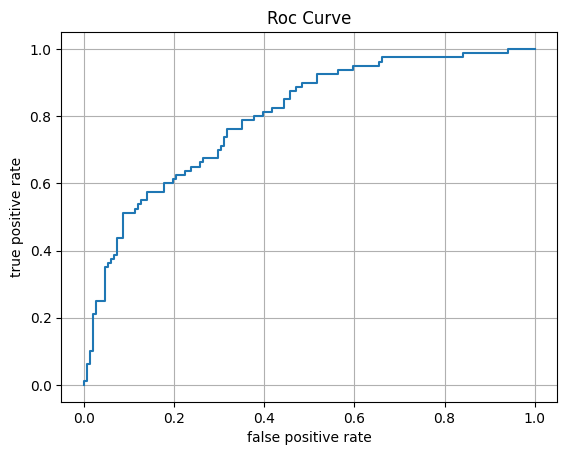

In [46]:
plt.plot(fpr,tpr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Roc Curve")
plt.grid()
plt.show()

In [55]:
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump((model, scalar), f)

print("Model saved as diabetes_model.pkl")

Model saved as diabetes_model.pkl


In [56]:
import gradio as gr
import numpy as np
import pickle

# Load Model
model, scaler = pickle.load(open("diabetes_model.pkl", "rb"))

def predict_diabetes(preg, glucose, bp, skin, insulin, bmi, dpf, age):
    data = np.array([[preg, glucose, bp, skin, insulin, bmi, dpf, age]])
    scaled = scaler.transform(data)
    pred = model.predict(scaled)[0]
    return "Diabetic" if pred == 1 else "Not Diabetic"

inputs = [
    gr.Number(label="Pregnancies"),
    gr.Number(label="Glucose"),
    gr.Number(label="Blood Pressure"),
    gr.Number(label="Skin Thickness"),
    gr.Number(label="Insulin"),
    gr.Number(label="BMI"),
    gr.Number(label="Diabetes Pedigree Function"),
    gr.Number(label="Age"),
]

gr.Interface(
    fn=predict_diabetes,
    inputs=inputs,
    outputs=gr.Text(label="Prediction"),
    title="Diabetes Prediction App",
    description="Enter patient details to predict diabetes using Logistic Regression"
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://23082187400e5a4fd1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
